In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [28]:
data=pd.read_csv(r"C:\Users\HP\Downloads\EPL DataSet.csv")
data

,Players_Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0,80
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0,88
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,74
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0,84
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,Lys Mousset,Sheffield United,FRA,"FW,MF",24,11,2,296,0,0,50,80.0,0,0,0.22,0.10,0,0,26
528,Jack O Connell,Sheffield United,ENG,DF,26,2,2,180,0,0,77,77.9,0,0,0.00,0.00,0,0,90
529,Iliman Ndiaye,Sheffield United,FRA,MF,21,1,0,12,0,0,3,100.0,0,0,0.00,0.00,0,0,12
530,Antwoine Hackford,Sheffield United,ENG,"DF,FW",16,1,0,11,0,0,1,100.0,0,0,1.16,0.00,0,0,11


In [30]:
features = [
    'Age', 'Matches', 'Starts', 'Mins', 'Assists',
    'xG', 'xA', 'Passes_Attempted', 'Perc_Passes_Completed', 'MinsPerMatch'
]

In [32]:
target = 'Goals'


In [36]:
X = data[features]
y = data[target]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
model = LinearRegression()


In [42]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [44]:
y_pred = model.predict(X_test)


In [46]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [48]:
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error: 1.24
R² Score: 0.60


In [56]:
# check the model 
import pandas as pd
input_data = pd.DataFrame([{
    'Age': 30,
    'Matches': 30,
    'Starts': 20,
    'Mins': 1500,
    'Assists': 6,
    'xG': 0.35,
    'xA': 0.30,
    'Passes_Attempted': 1200,
    'Perc_Passes_Completed': 82.5,
    'MinsPerMatch': 83
}])

predicted_goals = model.predict(input_data)[0]
print(f"Predicted Goals: {predicted_goals:.2f}")


Predicted Goals: 7.27


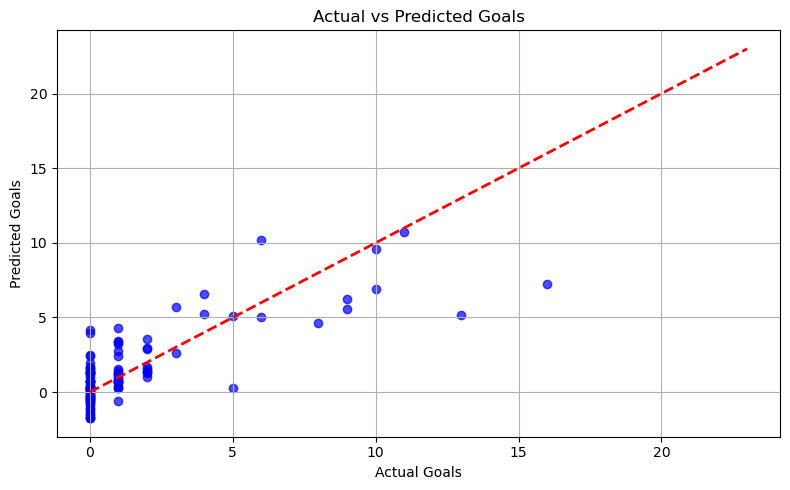

In [58]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Goals")
plt.ylabel("Predicted Goals")
plt.title("Actual vs Predicted Goals")
plt.grid(True)
plt.tight_layout()
plt.show()

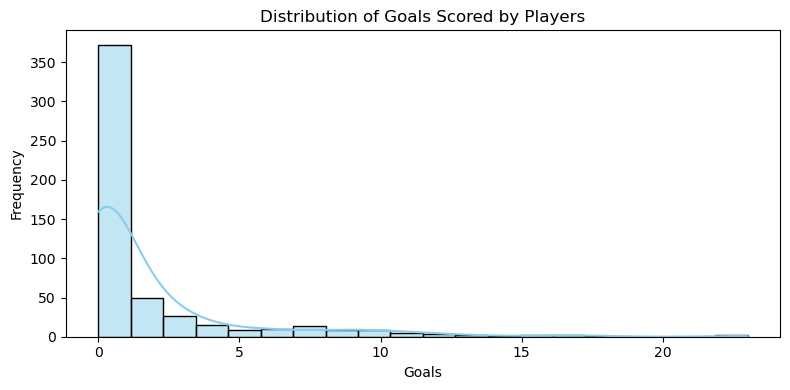

In [62]:
plt.figure(figsize=(8, 4))
sns.histplot(data['Goals'], kde=True, bins=20, color='skyblue')
plt.title("Distribution of Goals Scored by Players")
plt.xlabel("Goals")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


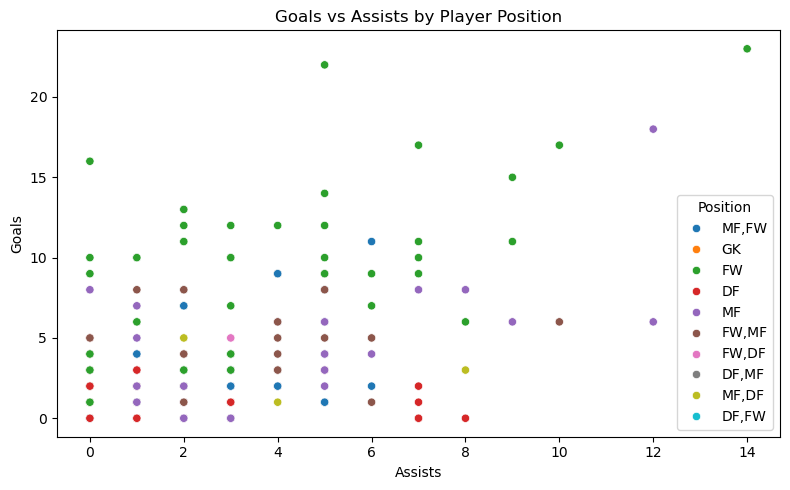

In [66]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data, x='Assists', y='Goals', hue='Position')
plt.title("Goals vs Assists by Player Position")
plt.xlabel("Assists")
plt.ylabel("Goals")
plt.legend(title="Position")
plt.tight_layout()
plt.show()

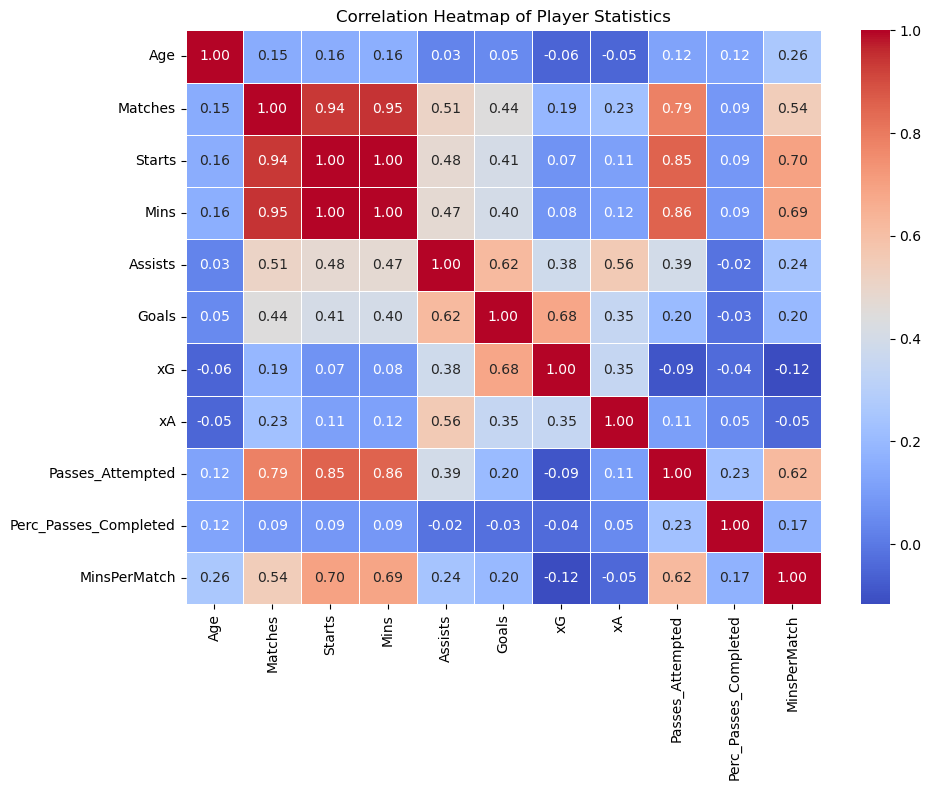

In [68]:
numeric_features = [
    'Age', 'Matches', 'Starts', 'Mins', 'Assists', 'Goals',
    'xG', 'xA', 'Passes_Attempted', 'Perc_Passes_Completed', 'MinsPerMatch'
]

plt.figure(figsize=(10, 8))
correlation = data[numeric_features].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Player Statistics")
plt.tight_layout()
plt.show()